In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df = pd.read_csv("train.csv",low_memory=False)

In [6]:
df.shape

(1048575, 17)

In [7]:
df.columns = ['ID','vendor_id','pickup_loc','drop_loc','driver_tip','mta_tax','distance','pickup_time','drop_time','num_passengers','toll_amount','payment_method','rate_code','stored_flag','extra_charges','improvement_charge','total_amount']

In [8]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


In [9]:
df = df.dropna()

In [10]:
df.columns

Index(['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'total_amount'],
      dtype='object')

In [11]:
df.dtypes

ID                      int64
vendor_id              object
pickup_loc            float64
drop_loc              float64
driver_tip             object
mta_tax                object
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount            object
payment_method        float64
rate_code             float64
stored_flag            object
extra_charges          object
improvement_charge     object
total_amount           object
dtype: object

In [12]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [196]:
df = df.dropna()

In [198]:
df.isna().sum()
df.shape

(1048573, 17)

In [199]:
df['vendor_id'].unique()

array(['1', '2'], dtype=object)

In [200]:
df['vendor_id'] = df['vendor_id'].apply(pd.to_numeric, errors='coerce')

In [201]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip             object
mta_tax                object
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount            object
payment_method        float64
rate_code             float64
stored_flag            object
extra_charges          object
improvement_charge     object
total_amount           object
dtype: object

In [202]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [203]:
df['pickup_loc'].unique()

array([170., 151.,  68., 142., 238., 230., 236., 229., 132., 114., 264.,
       166., 263., 137.,  90., 141., 211., 138., 164., 148., 237., 261.,
       234., 186., 161., 107., 140.,  24., 113.,  13., 231., 143., 239.,
       249.,  48.,   4., 162., 158., 163.,  79., 224., 223., 179.,  75.,
       125.,  87., 100., 233.,  12., 262., 144.,  43.,  74., 152.,  66.,
       226., 112.,   7.,  41., 246.,  50.,  88., 256., 193.,  45.,  65.,
       146.,  42.,  85.,  34., 209., 145., 189.,  61., 232., 116.,  52.,
       244.,  80.,  56.,  33., 260., 181.,  17., 194., 196., 259.,  37.,
       197., 188., 127., 255., 228., 247.,  25.,  93.,  49., 265., 215.,
        40., 198., 220., 129., 106.,  82., 130.,  10., 217.,  97.,  95.,
       190., 195.,  18., 167., 157.,  36.,  89., 219.,  28., 119., 168.,
       208.,  62., 243., 225.,  92., 169.,  54., 136., 134., 242.,   9.,
        70.,   1., 124., 156., 227., 159., 207.,  83., 135.,  35., 216.,
        73.,  47., 235., 173.,  26., 218., 108., 12

In [204]:
df['pickup_loc'].value_counts()

237.0    46432
161.0    45895
236.0    42986
162.0    40625
230.0    36620
170.0    36102
234.0    35692
186.0    35417
48.0     30838
163.0    30222
142.0    29798
138.0    28914
239.0    26289
164.0    25270
107.0    24290
132.0    24231
141.0    24107
68.0     22955
79.0     22806
100.0    22431
229.0    20618
238.0    20592
231.0    20483
140.0    19732
249.0    18720
90.0     18529
113.0    17850
263.0    17367
264.0    14736
233.0    14550
         ...  
64.0         2
31.0         2
21.0         2
73.0         2
101.0        2
77.0         2
248.0        2
3.0          2
81.0         2
86.0         2
23.0         2
240.0        1
29.0         1
259.0        1
131.0        1
183.0        1
204.0        1
139.0        1
122.0        1
118.0        1
221.0        1
109.0        1
150.0        1
176.0        1
214.0        1
99.0         1
206.0        1
201.0        1
84.0         1
184.0        1
Name: pickup_loc, Length: 244, dtype: int64

In [205]:
df['drop_loc'].unique()

array([233., 243.,  90., 234., 238.,  48., 140.,  13., 141., 164., 170.,
       264., 151., 246., 138.,  79., 230., 263., 232., 143., 229.,  50.,
       237., 144.,  24., 142., 100., 161.,  75., 236., 239., 261.,  41.,
       162., 125.,   7., 137., 158., 107., 116.,  74., 113., 211., 186.,
        68., 132.,  87., 179., 226., 249., 145., 262.,  42.,  33., 166.,
       218.,  82., 163.,  45., 224., 231., 222., 244., 152., 220., 256.,
        66., 265., 216., 225., 102.,  80., 148., 202.,  25., 255.,  12.,
       223., 114.,  43., 193.,   1.,  85.,  88.,  14., 149., 181., 112.,
       169., 248.,  40.,  49., 257.,  52.,  39.,   4., 196.,  65.,  61.,
       146., 127., 209.,  91., 200., 168., 180., 195., 130.,  95., 228.,
        36.,  97., 173., 203.,  89., 129., 189.,  18.,  67.,  83.,  37.,
        70., 201., 134., 247.,  69., 135., 259.,  10., 121.,  59., 252.,
         9.,  98., 188., 198., 213.,  17., 182.,  28., 241., 106.,  63.,
        54.,  26., 126.,  60.,  76., 160., 217.,  3

In [206]:
df['drop_loc'].value_counts()

161.0    46018
236.0    44228
237.0    41105
162.0    36951
170.0    35574
230.0    33323
234.0    31895
163.0    27852
142.0    26747
186.0    25552
239.0    25368
48.0     25146
141.0    24180
164.0    22750
68.0     21969
238.0    21688
107.0    21668
79.0     19961
140.0    19957
231.0    19820
229.0    18480
263.0    17265
246.0    17149
100.0    17108
113.0    15907
233.0    15727
249.0    15391
90.0     15062
137.0    14678
138.0    13720
         ...  
122.0       27
58.0        27
214.0       24
221.0       23
6.0         23
251.0       19
206.0       19
96.0        16
109.0       15
172.0       14
46.0        13
111.0       12
115.0       12
8.0         12
118.0       10
176.0       10
253.0        9
245.0        8
5.0          8
184.0        8
84.0         7
204.0        7
27.0         6
154.0        6
59.0         5
44.0         5
30.0         3
105.0        3
187.0        2
2.0          1
Name: drop_loc, Length: 260, dtype: int64

In [207]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip             object
mta_tax                object
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount            object
payment_method        float64
rate_code             float64
stored_flag            object
extra_charges          object
improvement_charge     object
total_amount           object
dtype: object

In [13]:
df['driver_tip'].unique()

array(['1.83', '3.56', '1.5', ..., '99', '9.42', '37.2'], dtype=object)

In [14]:
df['driver_tip'].dtypes

dtype('O')

In [15]:
df['driver_tip'].value_counts()

0        351304
1         64393
2         34024
1.5       14669
3         10931
1.95      10629
1.56      10257
1.45      10238
1.66      10238
1.46       9965
1.76       9887
1.36       9826
1.55       9807
1.86       9542
1.7        9101
1.96       8957
1.26       8888
1.25       8763
1.2        8736
2.06       8592
2.45       8502
2.16       8067
1.85       7993
1.75       7928
2.05       7913
1.16       7361
1.65       7294
5          7187
2.26       7180
1.35       7035
          ...  
24.64         1
10.57         1
17.83         1
19.44         1
35.36         1
21.15         1
18.22         1
5.24          1
24.69         1
17.51         1
25.96         1
40.8          1
16.49         1
15.81         1
17.04         1
15.74         1
15.59         1
40.55         1
30.24         1
47.77         1
41.81         1
72.2          1
19.81         1
24.76         1
14.24         1
16.78         1
9.42          1
2.54          1
13.69         1
25.21         1
Name: driver_tip, Length

In [16]:
df['driver_tip'] = df['driver_tip'].apply(pd.to_numeric, errors='coerce')

In [17]:
df['driver_tip'].isna().sum()

12

In [18]:
df['driver_tip'].unique()

array([ 1.83,  3.56,  1.5 , ..., 99.  ,  9.42, 37.2 ])

In [217]:
df['driver_tip'].fillna(0.0,inplace=True)

In [218]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax                object
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount            object
payment_method        float64
rate_code             float64
stored_flag            object
extra_charges          object
improvement_charge     object
total_amount           object
dtype: object

In [219]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [220]:
df['mta_tax'].value_counts()

0.5         1042799
0              5269
+AC0-0.5        505
Name: mta_tax, dtype: int64

In [221]:
df['mta_tax'].unique()

array(['0.5', '0', '+AC0-0.5'], dtype=object)

In [222]:
df['mta_tax'].replace('+AC0-0.5','-0.5',inplace=True)

In [71]:
df['mta_tax'].fillna('0.5',inplace=True)

In [76]:
df['mta_tax'].isna().sum()

0

In [223]:
df['mta_tax'] = df['mta_tax'].apply(pd.to_numeric, errors='coerce')

In [224]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [225]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
pickup_time            object
drop_time              object
num_passengers        float64
toll_amount            object
payment_method        float64
rate_code             float64
stored_flag            object
extra_charges          object
improvement_charge     object
total_amount           object
dtype: object

In [226]:
df['drop_time'].value_counts()

04/05/2017 12:00:00 AM    38
04/07/2017 12:00:00 AM    37
04/04/2017 12:00:00 AM    33
04/06/2017 12:00:00 AM    29
04/08/2017 12:00:00 AM    19
04/05/2017 08:13:10 AM    17
04/06/2017 08:47:42 AM    15
04/05/2017 11:29:04 PM    15
04/05/2017 07:03:48 PM    14
04/04/2017 07:20:00 PM    14
04/05/2017 06:57:28 PM    14
04/05/2017 07:55:44 PM    14
04/04/2017 10:17:26 PM    14
04/05/2017 10:43:46 PM    14
04/05/2017 07:37:22 PM    14
04/05/2017 09:40:16 PM    13
04/05/2017 09:37:07 PM    13
04/06/2017 08:16:30 PM    13
04/07/2017 08:31:20 AM    13
04/05/2017 06:24:01 PM    13
04/05/2017 02:20:25 PM    13
04/05/2017 09:23:41 PM    13
04/04/2017 08:51:11 AM    13
04/03/2017 08:51:55 PM    13
04/06/2017 08:48:38 AM    13
04/05/2017 05:41:13 PM    13
04/05/2017 09:51:43 PM    13
04/06/2017 03:20:39 PM    13
04/05/2017 07:42:27 PM    13
04/04/2017 07:00:20 PM    13
                          ..
04/06/2017 08:28:55 PM     1
04/04/2017 01:36:31 AM     1
04/05/2017 01:06:04 AM     1
04/30/2017 06:

In [89]:
df['drop_time'].fillna('04/05/2017 12:00:00 AM',inplace=True)

In [227]:
df['drop_time']= pd.to_datetime(df['drop_time'], dayfirst=True, errors='coerce')

In [93]:
df['pickup_time']= pd.to_datetime(df['pickup_time'], dayfirst=True, errors='coerce')

In [95]:
df.dtypes

ID                             int64
vendor_id                      int64
pickup_loc                   float64
drop_loc                     float64
driver_tip                   float64
mta_tax                      float64
distance                     float64
pickup_time           datetime64[ns]
drop_time             datetime64[ns]
num_passengers               float64
toll_amount                   object
payment_method               float64
rate_code                    float64
stored_flag                   object
extra_charges                 object
improvement_charge            object
total_amount                  object
dtype: object

In [96]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        1
toll_amount           2
payment_method        1
rate_code             1
stored_flag           1
extra_charges         1
improvement_charge    2
total_amount          2
dtype: int64

In [102]:
df = df.dropna()

In [103]:
df.shape

(1048573, 17)

In [114]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [113]:
df.dtypes

ID                             int64
vendor_id                      int64
pickup_loc                   float64
drop_loc                     float64
driver_tip                   float64
mta_tax                      float64
distance                     float64
pickup_time           datetime64[ns]
drop_time             datetime64[ns]
num_passengers               float64
toll_amount                  float64
payment_method               float64
rate_code                    float64
stored_flag                   object
extra_charges                 object
improvement_charge            object
total_amount                  object
dtype: object

In [109]:
df['toll_amount'].unique()

array(['0', '5.76', '5.54', '2.64', '17.5', '15', '11.52', '7', '2.16',
       '10.5', '16.26', '20', '5.78', '15.5', '16.5', '12.5', '10.08',
       '18.25', '15.01', '10.05', '22.02', '14.65', '5.11', '8.5', '14.1',
       '2.7', '27.5', '11', '5.5', '6.5', '17.28', '26.26', '14.95',
       '10.2', '29', '5.4', '15.1', '19.5', '16', '17', '13.5', '25',
       '17.58', '23.26', '21', '18.5', '14.82', '6', '17.1', '18.26',
       '5.56', '14.5', '15.45', '13', '26.7', '15.3', '5', '5.74', '20.5',
       '18', '24', '24.5', '5.55', '12.65', '18.8', '14.58', '8.76',
       '0.02', '0.06', '15.4', '14.06', '1.5', '12.95', '11.08', '19',
       '2.54', '14', '30.76', '14.8', '16.9', '21.26', '67.5', '57.76',
       '5.46', '16.95', '24.76', '8.4', '20.76', '24.02', '15.05', '19.8',
       '17.4', '7.92', '16.1', '95.76', '3', '21.9', '5.77', '16.04',
       '15.35', '5.75', '7.51', '9.53', '5.28', '16.8', '5.88', '5.73',
       '13.75', '8', '5.7', '21.5', '14.26', '5.84', '54', '15.95',
 

In [110]:
df['toll_amount'].value_counts()

0         991573
5.76       51321
10.5        1106
5.54         669
12.5         606
2.64         532
11.52        269
15.5         123
16.26        121
17.5         119
8.5          102
17.28         91
16.5          82
18.5          77
18.26         70
15            60
18            59
16            46
17            46
5.75          45
2.16          43
21            40
6             37
5.74          36
25            35
5.78          32
14.5          31
19.5          29
5.56          28
15.4          27
           ...  
16.95          1
2.7            1
5.83           1
17.29          1
22.76          1
18.76          1
5.08           1
28.26          1
5.62           1
55             1
405.84         1
0.3            1
24.01          1
25.7           1
22.22          1
25.26          1
7.25           1
40             1
26             1
6.43           1
23.91          1
5.68           1
7.2            1
571.32         1
16.42          1
18.4           1
11.09          1
21.01         

In [108]:
df['toll_amount'].replace('+AC0-5.76','0',inplace=True)

C:\Users\Vivek Rai\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [111]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [112]:
df['toll_amount'] = df['toll_amount'].apply(pd.to_numeric, errors='coerce')

C:\Users\Vivek Rai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
df['num_passengers'].value_counts()

1.0    774452
2.0    138018
5.0     49555
3.0     38301
6.0     30971
4.0     17217
0.0        46
7.0         6
8.0         4
9.0         3
Name: num_passengers, dtype: int64

In [118]:
df['rate_code'].unique()

array([ 1.,  2.,  3.,  4.,  5., 99.,  6.])

In [119]:
df = df.drop(columns=['stored_flag','payment_method'])

In [120]:
df.shape

(1048573, 15)

In [131]:
df.dtypes

ID                             int64
vendor_id                      int64
pickup_loc                   float64
drop_loc                     float64
driver_tip                   float64
mta_tax                      float64
distance                     float64
pickup_time           datetime64[ns]
drop_time             datetime64[ns]
num_passengers               float64
toll_amount                  float64
rate_code                    float64
extra_charges                float64
improvement_charge           float64
total_amount                  object
dtype: object

In [122]:
df['extra_charges'].unique()

array(['1', '0', '0.5', '4.5', '+AC0-0.5', '+AC0-1', '1.8', '0.8', '0.05',
       '+AC0-4.5', '6.5', '1.5', '0.2', '0.1', '1.3'], dtype=object)

In [125]:
df['extra_charges'].value_counts()

0       573701
0.5     267377
1       202493
4.5       4847
-0.5       139
-4.5         6
1.8          3
0.2          1
1.5          1
0.1          1
1.3          1
0.05         1
0.8          1
6.5          1
Name: extra_charges, dtype: int64

In [124]:
df['extra_charges'].replace('+AC0-0.5','-0.5',inplace=True)
df['extra_charges'].replace('+AC0-4.5','-4.5',inplace=True)
df['extra_charges'].replace('+AC0-1','1',inplace=True)

In [126]:
df['extra_charges'] = df['extra_charges'].apply(pd.to_numeric, errors='coerce')

In [128]:
df['improvement_charge'].value_counts()

0.3         1047768
+AC0-0.3        521
0               284
Name: improvement_charge, dtype: int64

In [129]:
df['improvement_charge'].replace('+AC0-0.3','-0.3',inplace=True)

In [130]:
df['improvement_charge'] = df['improvement_charge'].apply(pd.to_numeric, errors='coerce')

In [133]:
df['total_amount'].value_counts()

7.8       24068
7.3       23958
8.3       23315
8.8       23300
6.8       23275
6.3       20777
9.3       20726
9.8       19627
10.3      18466
5.8       17992
10.8      16853
11.3      15467
11.8      14548
5.3       13870
12.3      13332
12.8      12426
13.3      11573
13.8      10523
9.36      10214
9.96      10176
8.76       9919
10.56      9784
8.16       9757
14.3       9668
11.16      9477
4.8        9476
11.76      8913
7.56       8859
15.3       8776
14.8       8762
          ...  
121.62        1
17.24         1
49.9          1
15.79         1
130.4         1
28.35         1
102.97        1
202.27        1
83.44         1
109.27        1
84.24         1
29.22         1
49.99         1
79.22         1
5.58          1
84.44         1
255.82        1
36.73         1
16.79         1
81.23         1
86.53         1
179.06        1
44.29         1
30.15         1
17.92         1
95.28         1
59.31         1
138.97        1
4.84          1
70.75         1
Name: total_amount, Leng

In [134]:
df['total_amount'] = df['total_amount'].apply(pd.to_numeric, errors='coerce')

In [135]:
df.dtypes

ID                             int64
vendor_id                      int64
pickup_loc                   float64
drop_loc                     float64
driver_tip                   float64
mta_tax                      float64
distance                     float64
pickup_time           datetime64[ns]
drop_time             datetime64[ns]
num_passengers               float64
toll_amount                  float64
rate_code                    float64
extra_charges                float64
improvement_charge           float64
total_amount                 float64
dtype: object

In [136]:
y = df.pop('total_amount')

In [179]:
y.shape

(1048573,)

In [137]:
X = df


In [178]:
X.shape

(1048573, 15)

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

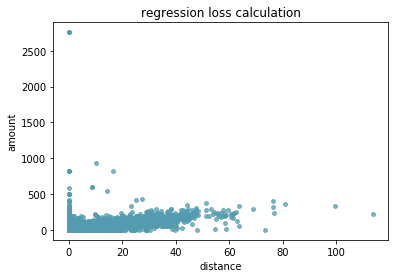

In [146]:
def scatter_plot(x_data, y_data, x_label, y_label, title):
    
    plt.scatter(x_data, y_data, s = 15, color = '#539caf', alpha = 0.75)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    
    
scatter_plot(x_data = X['distance']
            , y_data = y 
            , x_label = 'distance'
            , y_label = 'amount'
            , title = 'regression loss calculation')

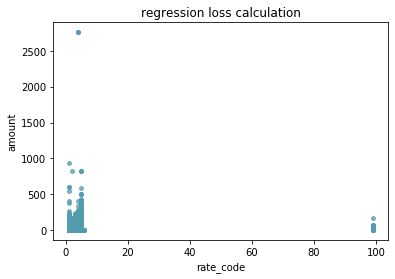

In [154]:
scatter_plot(x_data = X['rate_code']
            , y_data = y 
            , x_label = 'rate_code'
            , y_label = 'amount'
            , title = 'regression loss calculation')

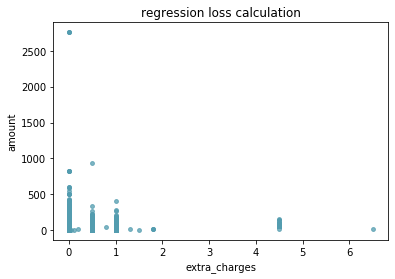

In [155]:
scatter_plot(x_data = X['extra_charges']
            , y_data = y 
            , x_label = 'extra_charges'
            , y_label = 'amount'
            , title = 'regression loss calculation')

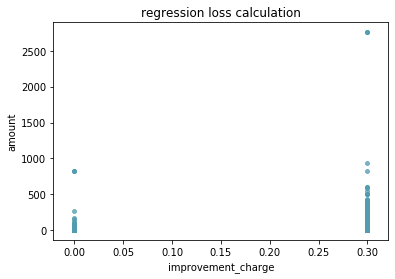

In [157]:
scatter_plot(x_data = X['improvement_charge']
            , y_data = y 
            , x_label = 'improvement_charge'
            , y_label = 'amount'
            , title = 'regression loss calculation')

In [159]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,pickup+AF8-loc,drop+AF8-loc,distance,num+AF8-passengers,payment+AF8-method,rate+AF8-code
ID,1,-0.00042329,-0.00110081,0.00150603,0.000272397,-0.000106945,0.000333966
pickup+AF8-loc,-0.00042329,1,0.111652,-0.0916372,-0.00658825,-0.00893897,-0.00496046
drop+AF8-loc,-0.00110081,0.111652,1,-0.104494,-0.00507197,-0.0059193,2.88572e-05
distance,0.00150603,-0.0916372,-0.104494,1,0.0182215,-0.0533546,0.215275
num+AF8-passengers,0.000272397,-0.00658825,-0.00507197,0.0182215,1,0.0096334,-0.00554423
payment+AF8-method,-0.000106945,-0.00893897,-0.0059193,-0.0533546,0.0096334,1,-0.00065175
rate+AF8-code,0.000333966,-0.00496046,2.88572e-05,0.215275,-0.00554423,-0.00065175,1


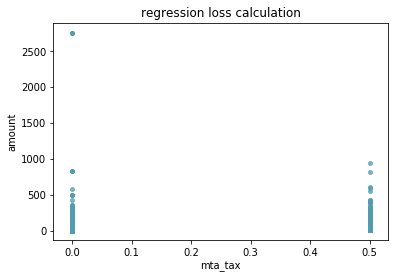

In [149]:
scatter_plot(x_data = X['mta_tax']
            , y_data = y 
            , x_label = 'mta_tax'
            , y_label = 'amount'
            , title = 'regression loss calculation')

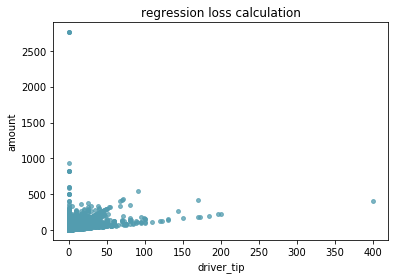

In [148]:
scatter_plot(x_data = X['driver_tip']
            , y_data = y 
            , x_label = 'driver_tip'
            , y_label = 'amount'
            , title = 'regression loss calculation')

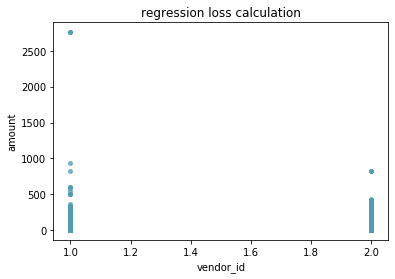

In [150]:
scatter_plot(x_data = X['vendor_id']
            , y_data = y 
            , x_label = 'vendor_id'
            , y_label = 'amount'
            , title = 'regression loss calculation')

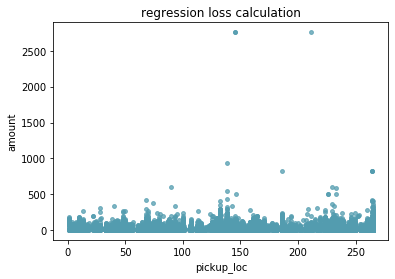

In [151]:
scatter_plot(x_data = X['pickup_loc']
            , y_data = y 
            , x_label = 'pickup_loc'
            , y_label = 'amount'
            , title = 'regression loss calculation')

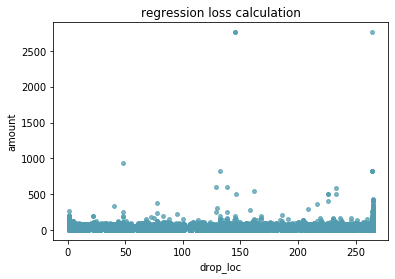

In [152]:
scatter_plot(x_data = X['drop_loc']
            , y_data = y 
            , x_label = 'drop_loc'
            , y_label = 'amount'
            , title = 'regression loss calculation')

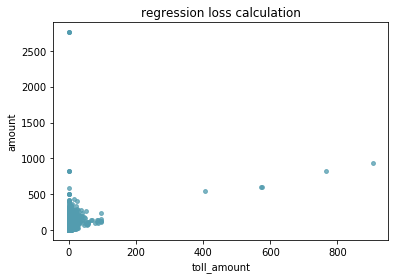

In [153]:
scatter_plot(x_data = X['toll_amount']
            , y_data = y 
            , x_label = 'toll_amount'
            , y_label = 'amount'
            , title = 'regression loss calculation')

C:\Users\Vivek Rai\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


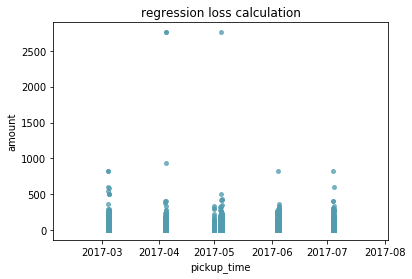

In [163]:
scatter_plot(x_data = X['pickup_time']
            , y_data = y 
            , x_label = 'pickup_time'
            , y_label = 'amount'
            , title = 'regression loss calculation')

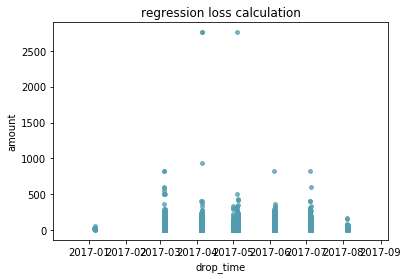

In [164]:
scatter_plot(x_data = X['drop_time']
            , y_data = y 
            , x_label = 'drop_time'
            , y_label = 'amount'
            , title = 'regression loss calculation')

In [165]:
df['journey_time'] = df['drop_time'] - df['pickup_time']

In [170]:
df['journey_time'].dtypes

dtype('int64')

In [169]:
df['journey_time'] = df['journey_time'].dt.days

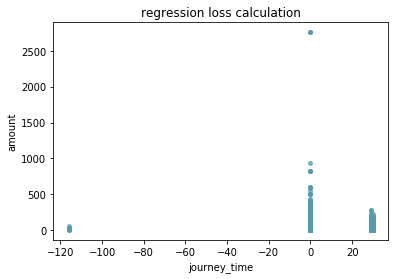

In [171]:
scatter_plot(x_data = X['journey_time']
            , y_data = y 
            , x_label = 'journey_time'
            , y_label = 'amount'
            , title = 'regression loss calculation')

In [175]:
df.columns

Index(['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'num_passengers', 'toll_amount', 'rate_code',
       'extra_charges', 'improvement_charge', 'journey_time'],
      dtype='object')

In [174]:
cols = ['pickup_time','drop_time']
df = df.drop(columns=cols)

In [184]:
X_train = X_train.drop(columns=cols)

In [187]:
X_train.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
num_passengers        0
toll_amount           0
rate_code             0
extra_charges         0
improvement_charge    0
journey_time          0
dtype: int64

In [183]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
num_passengers        float64
toll_amount           float64
rate_code             float64
extra_charges         float64
improvement_charge    float64
journey_time            int64
dtype: object

In [186]:
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


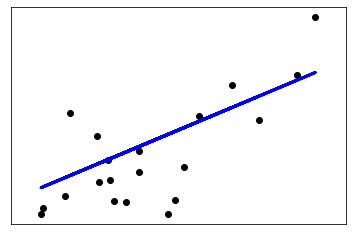

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [3]:
diabetes_X_test.shape

(20, 1)